<a href="https://colab.research.google.com/github/spattanaik9/Data-Visualization/blob/main/Data_Viz_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#1 Sankey
import pandas as pd
import plotly.graph_objects as go

data = pd.read_csv('/content/drive/MyDrive/Data Viz/Electric_Vehicle_Population_Data_20231028.csv')

aggregated_data = data.groupby(['Electric Vehicle Type', 'Make']).size().reset_index(name='Count')

labels = list(set(aggregated_data['Electric Vehicle Type'].unique()) | set(aggregated_data['Make'].unique()))
label_to_index = {label: idx for idx, label in enumerate(labels)}

source_mapped = aggregated_data['Electric Vehicle Type'].apply(lambda x: label_to_index[x]).tolist()
target_mapped = aggregated_data['Make'].apply(lambda x: label_to_index[x]).tolist()
values = aggregated_data['Count'].tolist()

In [46]:
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.3),
        label=labels
    ),
    link=dict(
        source=source_mapped,
        target=target_mapped,
        value=values
    )
)])

fig.update_layout(title_text="Distribution of Electric Vehicle Types' Flow among Car Brands", font_size=10, width=800, height=800,)
fig.show()

In [51]:
#2 Sunburst
import plotly.express as px
data = pd.read_csv('/content/drive/MyDrive/Data Viz/Electric_Vehicle_Population_Data_20231028.csv')

In [56]:
fig = px.sunburst(data, path=['Electric Vehicle Type', 'Make', 'Model'])

fig.update_layout(title='Electric Vehicle Types Distribution among Car Brands',
                  width=800,
                  height=600,
                  )
fig.show()

In [5]:
#3 Treemap
fig = px.treemap(data, path=['Electric Vehicle Type', 'Make', 'Model'])
fig.update_layout(title='Electric Vehicle Types Distribution among Car Brands and Models')
fig.show()

In [6]:
#4 Heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('/content/drive/MyDrive/Data Viz/Electric_Vehicle_Population_Data_20231028.csv')

data['Model Year'] = data['Model Year'].astype(str)

heatmap_data = data.groupby(['Model Year', 'Make']).size().unstack()


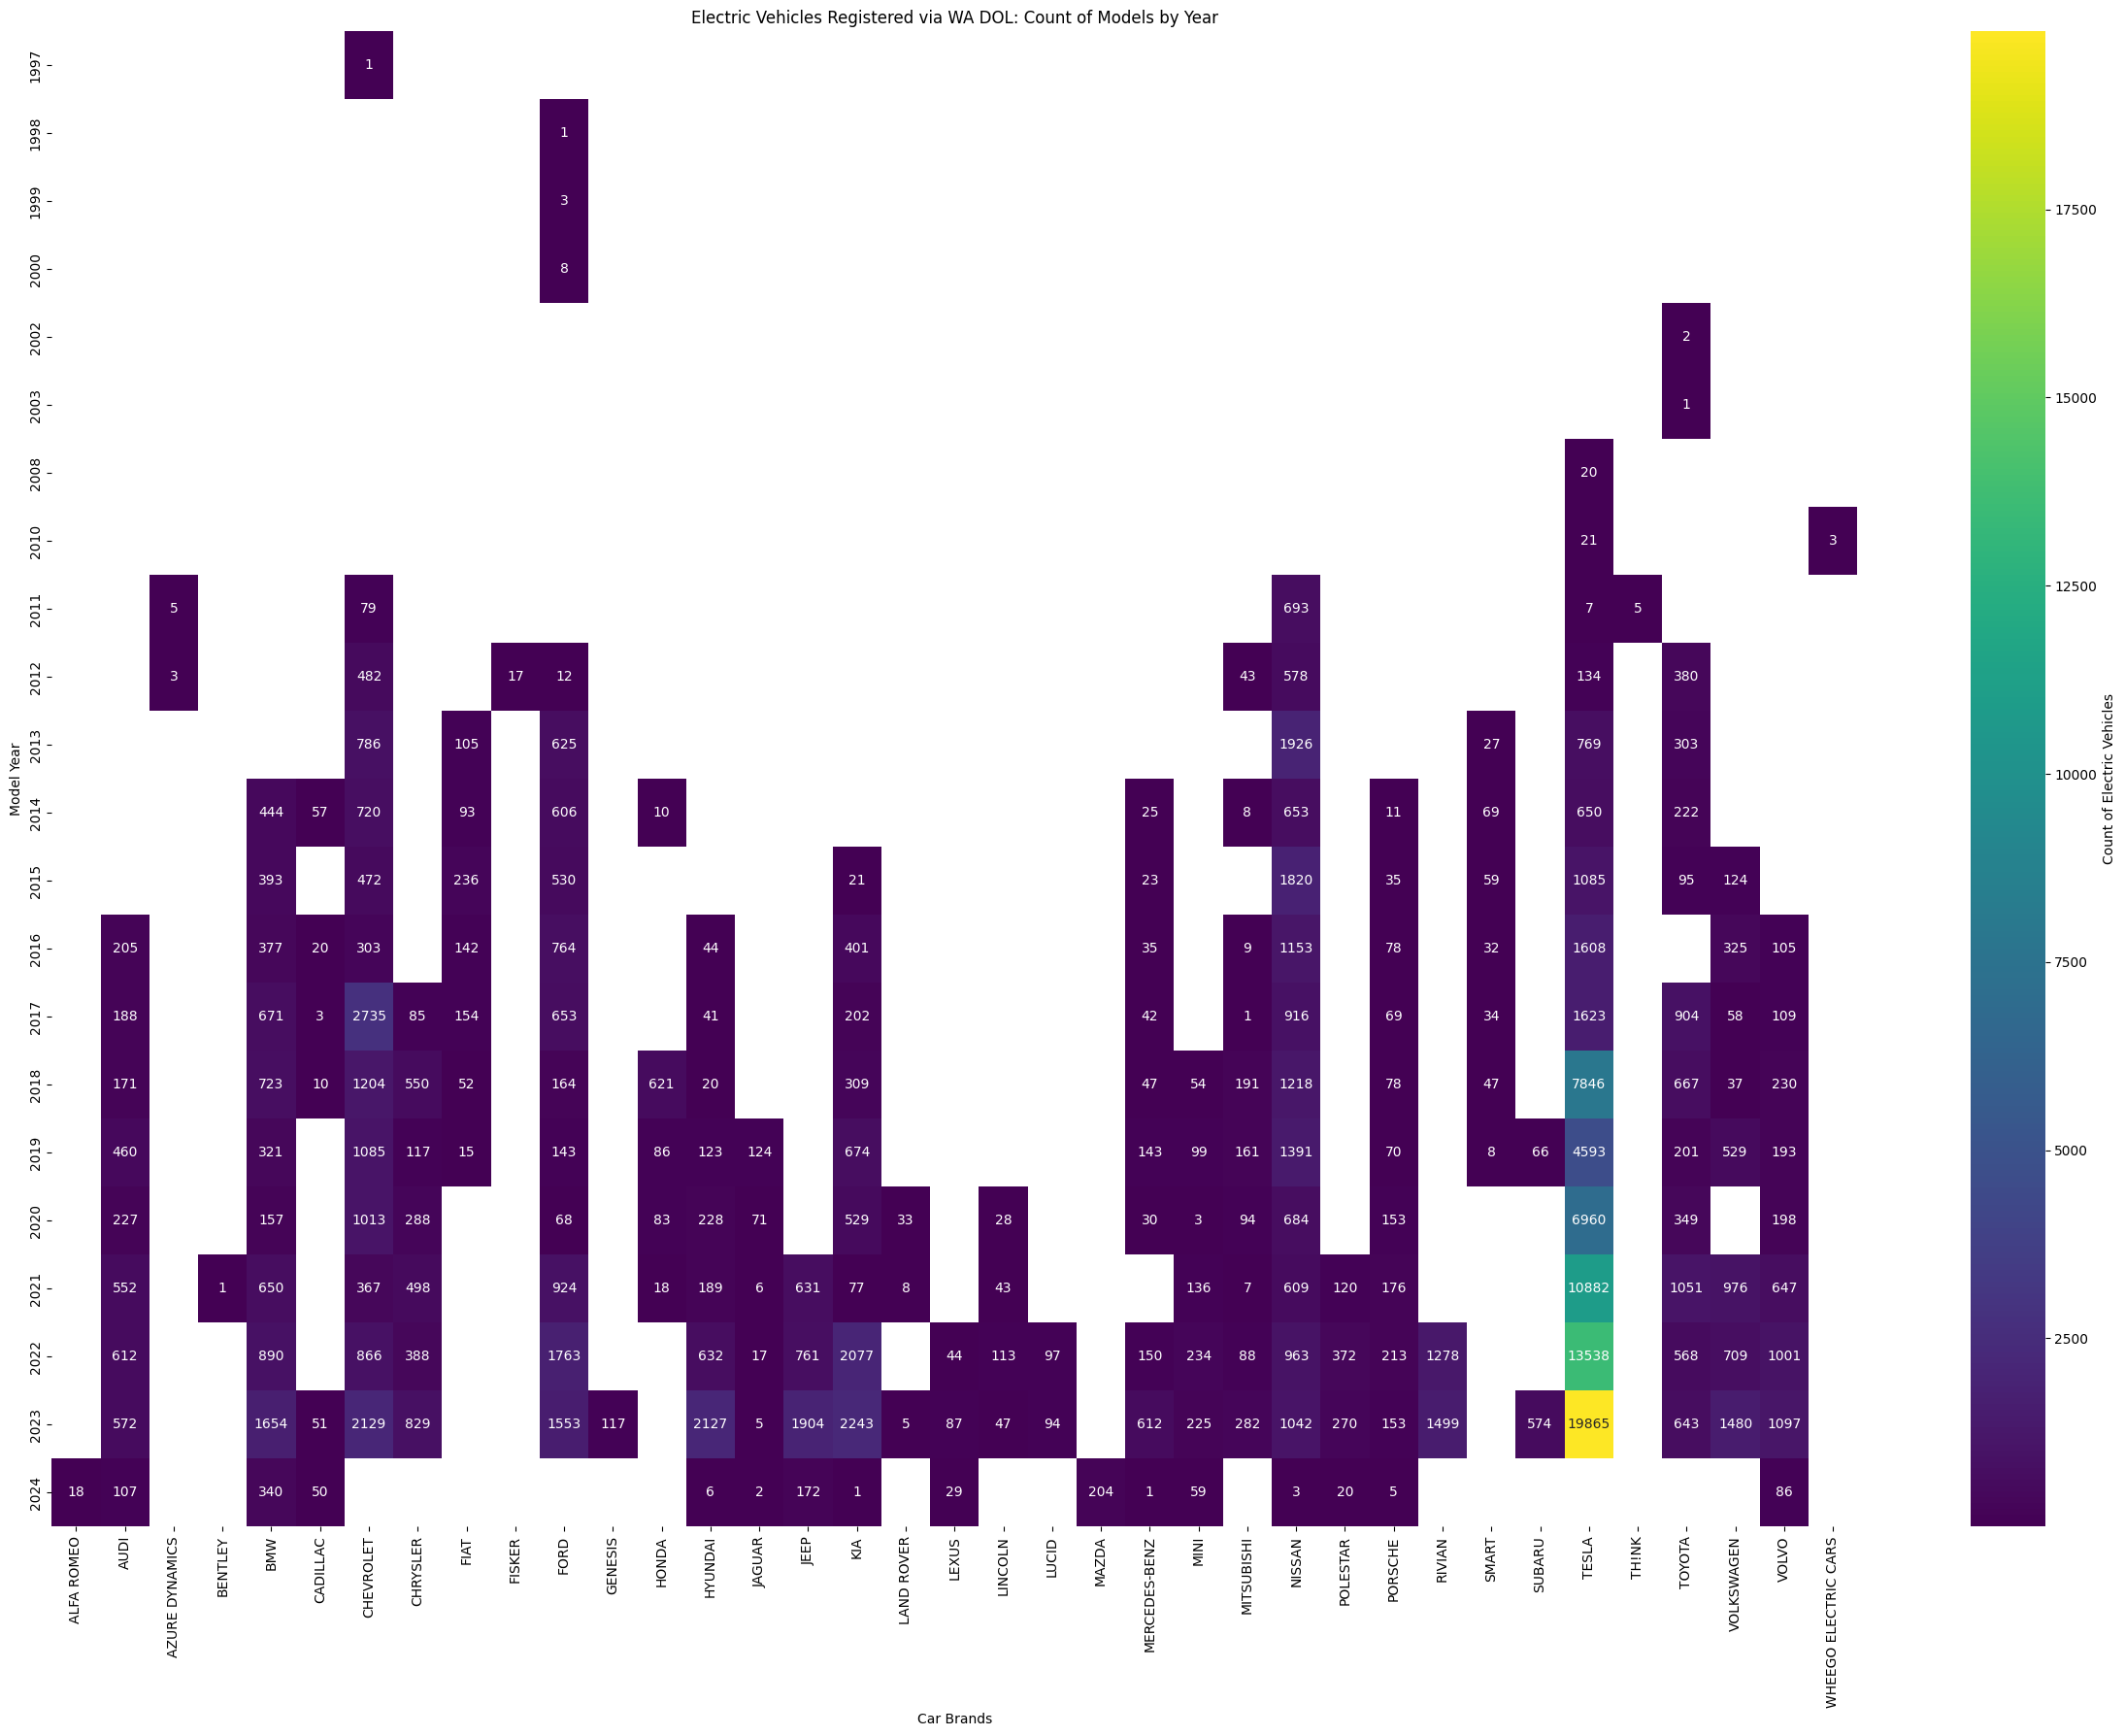

In [7]:
plt.figure(figsize=(30, 20))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Count of Electric Vehicles'})
plt.title('Electric Vehicles Registered via WA DOL: Count of Models by Year')
plt.xlabel('Car Brands')
plt.ylabel('Model Year')
plt.show()

In [8]:
#5 Map
import pandas as pd
import folium

data = pd.read_csv('/content/drive/MyDrive/Data Viz/Electric_Vehicle_Population_Data_20231028.csv')
geo_data = pd.read_csv('/content/drive/MyDrive/Data Viz/US.csv')

merged_data = pd.merge(data, geo_data, left_on='Postal Code', right_on='Zipcode', how='left')

In [9]:
merged_data = merged_data.dropna(subset=['Postal Code'])
merged_data = merged_data.dropna(subset=['Latitude', 'Longitude'])

In [ ]:
data = merged_data

m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=6)

location_counts = data.groupby(['Latitude', 'Longitude']).size().reset_index(name='Row_Count')

for _, row in location_counts.iterrows():

    radius_multiplier = 0.008
    radius = row['Row_Count'] * radius_multiplier
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=radius, color='blue', fill=False).add_to(m)

# Show the map
m


In [80]:
#7 node link
import networkx as nx
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Data Viz/Electric_Vehicle_Population_Data_20231028.csv')

df = pd.DataFrame(data)

G = nx.from_pandas_edgelist(df, 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Make', create_using=nx.DiGraph())

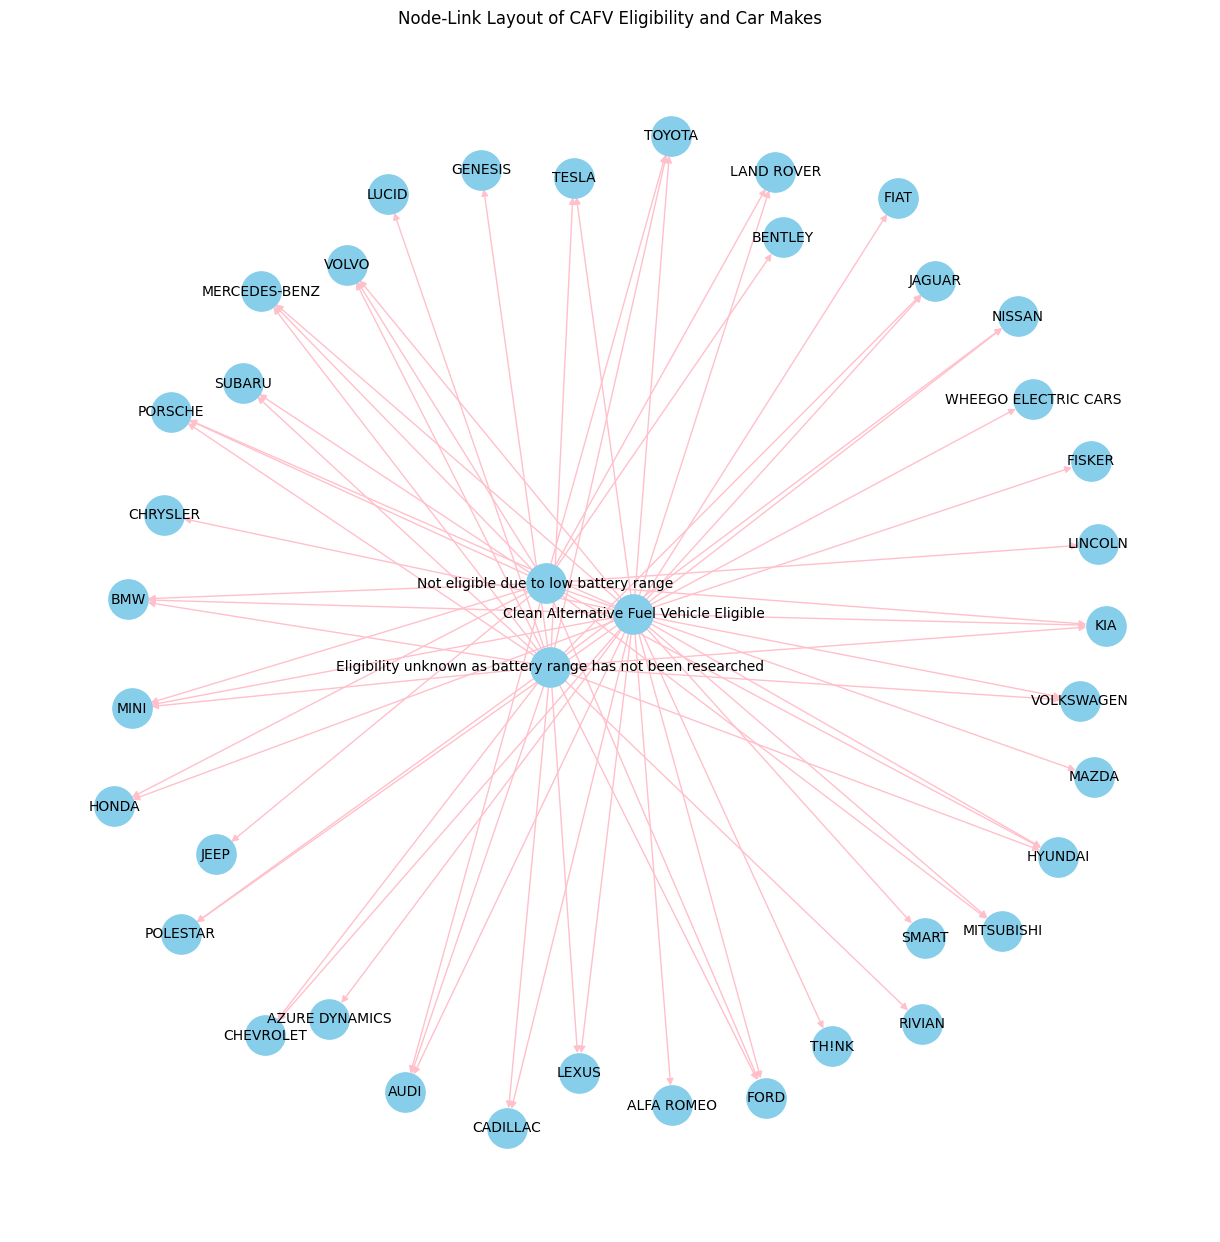

In [87]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=2)
nx.draw(G, pos, with_labels=True, node_size=800, node_color='skyblue', font_size=10, font_color='black', edge_color='pink', arrows=True)
plt.title("Node-Link Layout of CAFV Eligibility and Car Makes")
plt.show()

In [ ]:
#6 Dot Map
import plotly.express as px
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Data Viz/Electric_Vehicle_Population_Data_20231028.csv')

# Extracting longitude and latitude using regex
df = pd.DataFrame(data)
df = df.dropna(subset=['Vehicle Location'])
df['Longitude'] = df['Vehicle Location'].str.extract(r'POINT \(([-+]?\d+\.\d+)')
df['Latitude'] = df['Vehicle Location'].str.extract(r'[-+]?\d+\.\d+ ([-+]?\d+\.\d+)\)')

df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

In [139]:
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", color='Make', zoom=8)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()

In [225]:
#8 Circle Packing
data = pd.read_csv('/content/drive/MyDrive/Data Viz/Vehicle_Registration_Summary_20231028.csv')

df=pd.DataFrame(data)

counts_per_level = df['Electrification Level'].value_counts()

result_dict = []

for level, count in counts_per_level.items():
    filtered_df = df[df['Electrification Level'] == level]
    vehicle_type_counts = filtered_df['Vehicle Type'].value_counts().to_dict()
    children_list = [{'id': key, 'datum': value} for key, value in vehicle_type_counts.items()]

    level_dict = {
        'id': level,
        'datum': count,
        'children': children_list
    }

    result_dict.append(level_dict)

data = [{'id': 'Electrificaton Levels', 'datum': total_count, 'children' : result_dict}]


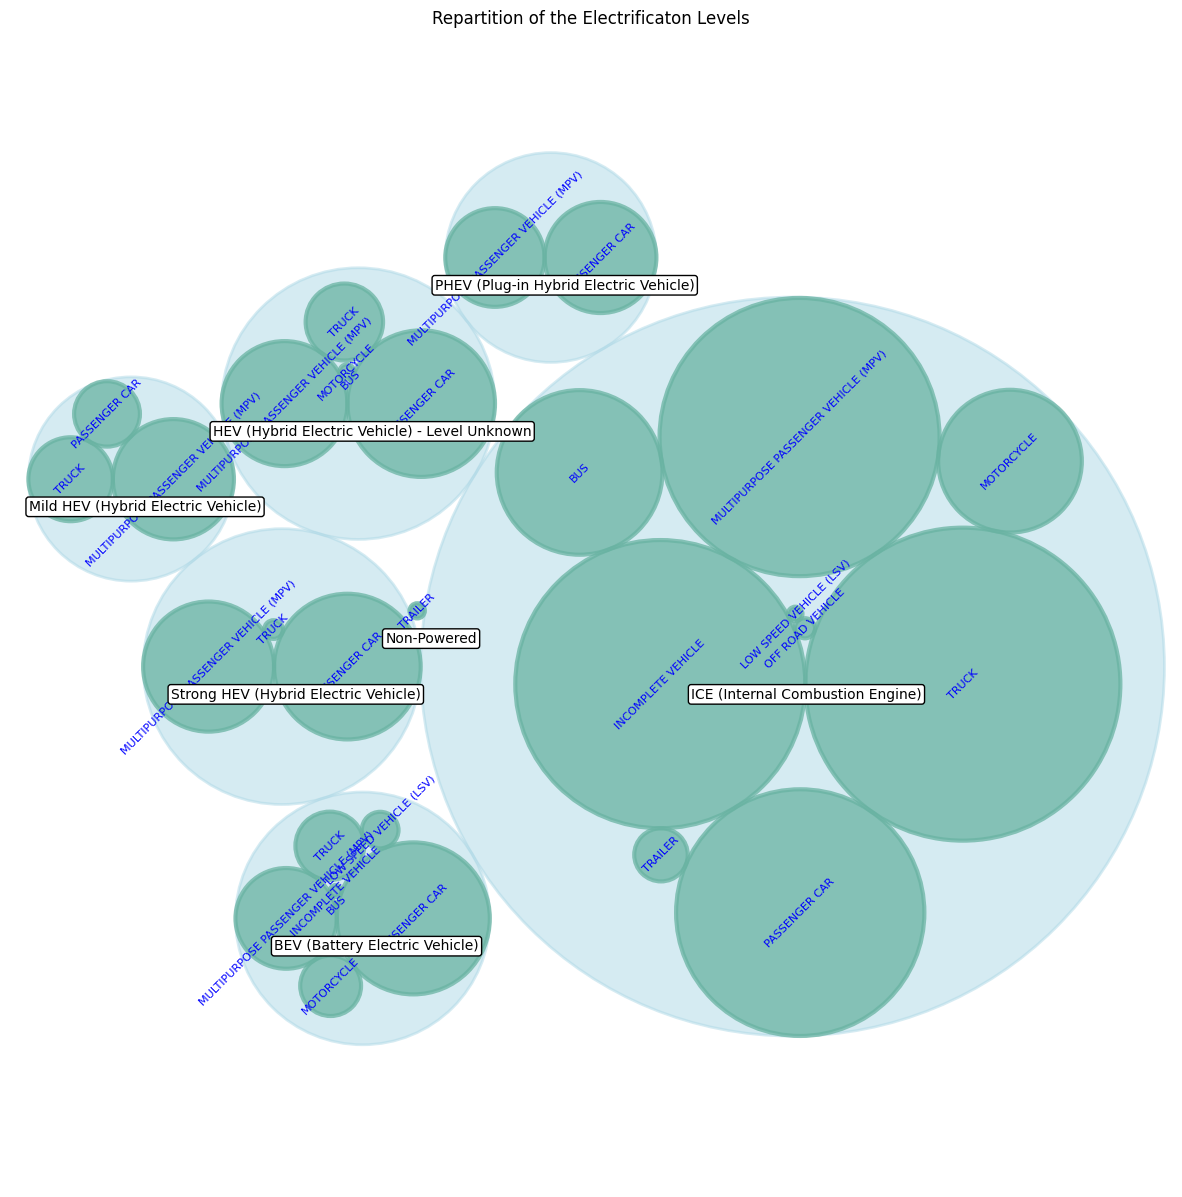

In [256]:
import circlify
import matplotlib.pyplot as plt

circles = circlify.circlify(
    data,
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

fig, ax = plt.subplots(figsize=(15,15))

ax.set_title('Repartition of the Electrificaton Levels')

ax.axis('off')

lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))

for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.75, linewidth=3, color="#69b3a2"))
    plt.annotate(label, (x, y), ha='center', color="blue", va='center', wrap=True,  rotation=45, fontsize=8)

for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y ) ,va='center', ha='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.2), xytext=(10, -20), textcoords='offset points')
